In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
(x_train_org, y_train_org),(x_test_org, y_test_org)=mnist.load_data()


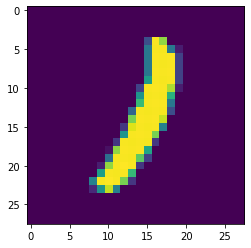

In [ ]:
plt.imshow(Image.fromarray(x_train_org[78]))
plt.show()


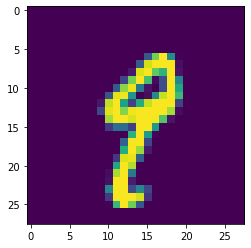

In [ ]:
plt.imshow(Image.fromarray(x_test_org[78]))
plt.show()

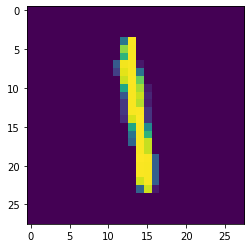

In [ ]:
plt.imshow(Image.fromarray(x_test_org[145]))
plt.show()

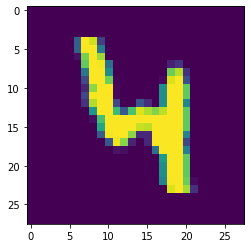

In [ ]:
plt.imshow(Image.fromarray(x_test_org[784]))
plt.show()

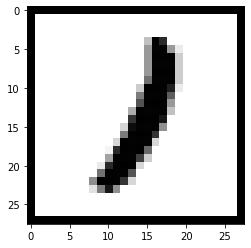

In [ ]:
for n in range(0,60000):
  x_train_org[n][0] = 255-x_train_org[n][0]
  x_train_org[n][0][0] = 255-x_train_org[n][0][0]
  x_train_org[n][0][-1] = 255-x_train_org[n][0][-1]
  x_train_org[n][-1] = 255-x_train_org[n][-1]
  for i in range(0,27):
    x_train_org[n][i][0] = 255-x_train_org[n][i][0]
    x_train_org[n][i][-1] = 255-x_train_org[n][i][-1]
for n in range(0,60000):
  for j in range(28):
    for k in range(28):
      x_train_org[n][j][k] = 255 - x_train_org[n][j][k]
plt.imshow(Image.fromarray(x_train_org[78]).convert('RGBA'))
plt.show()

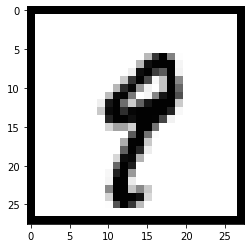

In [ ]:
plt.imshow(Image.fromarray(x_test_org[78]).convert('RGBA'))
plt.show()

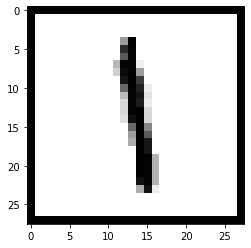

In [ ]:
plt.imshow(Image.fromarray(x_test_org[145]).convert('RGBA'))
plt.show()

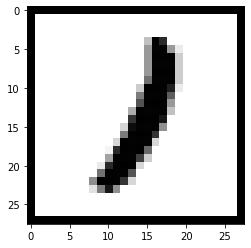

In [ ]:
plt.imshow(Image.fromarray(x_train_org[78]).convert('RGBA'))
plt.show()

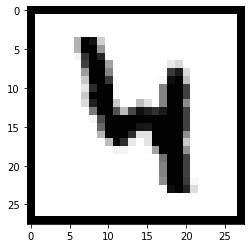

In [ ]:
plt.imshow(Image.fromarray(x_test_org[784]).convert('RGBA'))
plt.show()

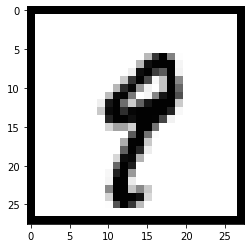

In [ ]:
for n in range(0,10000):
  x_test_org[n][0] = 255-x_test_org[n][0]
  x_test_org[n][0][0] = 255-x_test_org[n][0][0]
  x_test_org[n][0][-1] = 255-x_test_org[n][0][-1]
  x_test_org[n][-1] = 255-x_test_org[n][-1]
  for i in range(0,27):
    x_test_org[n][i][0] = 255-x_test_org[n][i][0]
    x_test_org[n][i][-1] = 255-x_test_org[n][i][-1]
for n in range(0,10000):
  for j in range(28):
    for k in range(28):
      x_test_org[n][j][k] = 255 - x_test_org[n][j][k]
      if x_test_org[n][j][k]<254:
        x_test_org[n][j][k]==0
plt.imshow(Image.fromarray(x_test_org[78]).convert('RGBA'))
plt.show()

In [ ]:
print(x_test_org[471][10])

[  0 255 255 255 255 255 255 255 255 223  30 139 253 255 255 255 255 203
  21 164 255 255 255 255 255 255 255   0]


In [ ]:
x_train=np.expand_dims(x_train_org/255, axis = 3)
y_train=utils.to_categorical(y_train_org/255,10)
y_test=utils.to_categorical(y_test_org,10)
x_test = np.expand_dims(x_test_org/255, axis = 3)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
weights_file = 'weights.h5'
callback = ModelCheckpoint(weights_file,
              monitor='acc',
              mode='max',
              save_best_only=True)

In [ ]:
model = Sequential([
    Conv2D(98, (5,4), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((4, 3), strides=2),
    Conv2D(76, (4,3), padding='same', activation='relu'),
    MaxPooling2D((3, 2), strides=3),
    Conv2D(32, (2,2), padding='same', activation='relu'),
    MaxPooling2D((3, 2), strides=2),
    Flatten(),
    Dense(240, activation='relu'),
    Dense(150, activation='relu'),
    Dense(10,  activation='softmax')
])
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

his = model.fit(x_train, y_train, batch_size=20, epochs=15, validation_split=0.02,callbacks = [callback])


Epoch 1/15
2940/2940 [==============================] - 254s 86ms/step - loss: 0.2832 - accuracy: 0.9226 - val_loss: 0.0682 - val_accuracy: 0.9775
Epoch 2/15
2940/2940 [==============================] - 251s 85ms/step - loss: 0.0993 - accuracy: 0.9706 - val_loss: 0.0756 - val_accuracy: 0.9783
Epoch 3/15
2940/2940 [==============================] - 251s 85ms/step - loss: 0.0794 - accuracy: 0.9762 - val_loss: 0.0906 - val_accuracy: 0.9758
Epoch 4/15
2940/2940 [==============================] - 251s 85ms/step - loss: 0.0652 - accuracy: 0.9811 - val_loss: 0.0782 - val_accuracy: 0.9858
Epoch 5/15
2940/2940 [==============================] - 251s 86ms/step - loss: 0.0652 - accuracy: 0.9812 - val_loss: 0.0835 - val_accuracy: 0.9875
Epoch 6/15
2940/2940 [==============================] - 251s 85ms/step - loss: 0.0569 - accuracy: 0.9839 - val_loss: 0.0642 - val_accuracy: 0.9892
Epoch 7/15
2940/2940 [==============================] - 248s 84ms/step - loss: 0.0578 - accuracy: 0.9846 - val_loss: 0

In [ ]:
model.save('neyro')


INFO:tensorflow:Assets written to: neyro/assets


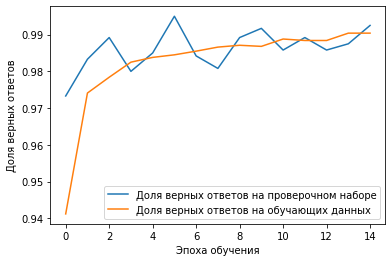

In [ ]:

plt.plot([0.9733,0.9833,0.9892,0.98,0.985,0.995,0.9842,0.9808,0.9892,0.9917,0.9858,0.9892,0.9858,0.9875,0.9925],label='Доля верных ответов на проверочном наборе')
plt.plot([0.9412,0.9741 ,0.9784 ,0.9825 ,0.9838, 0.9845,0.9855 ,0.9866 ,0.9871 ,0.9868 ,0.9888 ,0.9884 ,0.9884 ,0.9904 ,0.9904  ],label='Доля верных ответов на обучающих данных')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()